# IMPLEMENTATION OF LOGISTIC REGRESSION WITH LOG LOSS AND L2-REGULARISATION
---

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import math
from random import randint, random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

## 1.1 Creating binary classification dataset
---

In [2]:
X, Y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
print("The size of total data:", X.shape)
unique, counts = np.unique(Y, return_counts=True)
print("The distribution of classes:")
print(unique[0],":",counts[0])
print(unique[1],":",counts[1])

The size of total data: (50000, 15)
The distribution of classes:
0 : 34904
1 : 15096


In [3]:

# split the data into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)
print("The size of train data after split:", x_train.shape)
print("The size of test data after split:", x_test.shape)

The size of train data after split: (37500, 15)
The size of test data after split: (12500, 15)


## 1.2 implementing SGD classifier using sklearn library
---

In [4]:
from sklearn.linear_model import SGDClassifier

sk_sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=15, \
                       eta0=0.0001, tol=1e-3, verbose=2, learning_rate='constant', n_jobs=-1)

# SGGCLASSIFIER configuration
sk_sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [5]:
# start training on train data

sk_sgd.fit(x_train, y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.316714, T: 37500, Avg. loss: 0.457331
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.475044, T: 75000, Avg. loss: 0.396597
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.97, NNZs: 15, Bias: -0.584279, T: 112500, Avg. loss: 0.387556
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 15, Bias: -0.660523, T: 150000, Avg. loss: 0.384049
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 15, Bias: -0.719754, T: 187500, Avg. loss: 0.382411
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 15, Bias: -0.764148, T: 225000, Avg. loss: 0.381598
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.05, NNZs: 15, Bias: -0.798400, T: 262500, Avg. loss: 0.381066
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.820043, T: 300000, Avg. loss: 0.380855
Total training time: 0.11 seconds.
-- Epoch 9
Norm: 1.06, NNZs: 15, Bias: -0.838181, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [6]:
# The optimized co-efficients and intercept
print("The optimized coef: ", sk_sgd.coef_)
print("The shape of coef: ", sk_sgd.coef_.shape)
print("The optimized intercept: ", sk_sgd.intercept_)

The optimized coef:  [[-0.41857774  0.18297454 -0.14862447  0.33351081 -0.20011022  0.56284478
  -0.43937634 -0.08577392  0.2181987   0.17468164  0.18455603  0.00126932
  -0.06977052  0.33303106  0.01945716]]
The shape of coef:  (1, 15)
The optimized intercept:  [-0.85402538]


## 1.3 Implementing SGDClassifier with logloss(logistic Regression) without SKlearn

In [7]:
class SGDcustom():
    
    
    def __init__(self, alpha, lamda, verbose=False):
        self.alpha = alpha
        self.lamda = lamda
        self.verbose = verbose
        print("classifier is configured as")
        print("learning rate:", alpha, "\neta0: ", lamda)
        self._initialize_weight_bias()
    
    def _initialize_weight_bias(self):
        self.coeff = np.zeros((1, x_train.shape[1]))
        self.bias = 0.0
    
    def _sigmoid(self, a):
        return np.exp(a) / (np.exp(a) + 1)
    
    def predict_prob(self, x):
        prediction = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            y_pred = float(np.dot(self.coeff, x[i]) + self.bias)
            prediction[i] = self._sigmoid(y_pred)
            
        return prediction
    
    def predict(self, x_prob, threhold=0.5):
        return self.predict_prob(x_prob) >= threshold
    
    
    def _compute_log_loss(self, y_act, y_pred):

        summation = 0
        
        # compute the summation part as per formula
        for actual, pred in zip(y_act, y_pred) :
            
            #-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
            loss = actual * np.log(pred) + (1-actual) * np.log(1-pred)
            summation += loss
            
        return  -1 * (summation / len(y_act))

    def fit(self,x_tr, x_t, y_tr, y_t, n_epoch):
        
        train_logloss = []
        test_logloss = []
        
        for epoch in tqdm(range(n_epoch)):
            
            for i in range(len(x_tr)):            
                #rand = np.random.randint(0,len(x_tr)-1)
                y_p = self._sigmoid(np.dot(self.coeff, x_tr[i]) + self.bias)
                
                # update the weights
                self.coeff = ((1 - (self.alpha * self.lamda)/len(x_tr[i])) * self.coeff) + \
                            (self.alpha * (x_tr[i] * (y_tr[i] - y_p)))
                
                self.bias += (self.alpha * (y_tr[i] - y_p))
            

            
            # calulate the loss
            tr_y_hat = self.predict_prob(x_tr)       
            tr_loss = self._compute_log_loss(y_tr, tr_y_hat)
            train_logloss.append(tr_loss)

            te_y_hat = self.predict_prob(x_t)       
            te_loss = self._compute_log_loss(y_t, te_y_hat)
            test_logloss.append(te_loss)
            
    
            if self.verbose:
                print("="*50)
                print("Train Loss, Test Loss")
                print('>_ epoch=%d, loss=%.3f' % (epoch, tr_loss))
                print('>_ epoch=%d, loss=%.3f' % (epoch, te_loss))
        
        return train_logloss, test_logloss
    
    

In [8]:
cus_sgd = SGDcustom(0.0001, 0.0001, False)
tloss, testloss = cus_sgd.fit(x_train, x_test, y_train, y_test, 10)

classifier is configured as
learning rate: 0.0001 
eta0:  0.0001


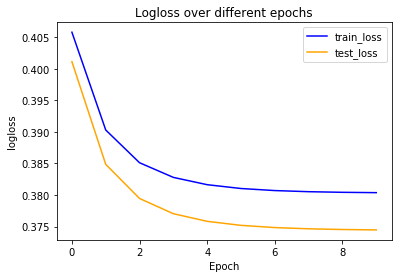

In [9]:
plt.plot(range(len(tloss)), tloss, color='b', label='train_loss')
plt.plot(range(len(tloss)), testloss, color='orange', label="test_loss")
plt.xlabel("Epoch")
plt.ylabel("logloss")
plt.title("Logloss over different epochs")
plt.legend()
plt.show()

In [12]:
cus_sgd.coeff - sk_sgd.coef_

array([[-5.41488031e-06,  2.06581761e-03,  2.05727643e-03,
         9.27775823e-04, -1.41673858e-02, -1.10430769e-03,
         2.42166207e-03, -5.40167097e-03, -6.14714684e-03,
        -1.13032086e-03,  1.18357330e-02, -2.85038009e-03,
        -4.51101510e-03, -2.71027313e-03,  5.43330815e-03]])

In [11]:
np.argmin(tloss),

(9,)